# Python для анализа данных

*Татьяна Рогович, НИУ ВШЭ*


## Библиотека pandas. Упражнения.

In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns
from scipy.stats import norm

Будем работать с датасетом Pima Indian Diabetes - это набор данных из Национального института диабета, болезней органов пищеварения и почек. Целью набора данных является диагностическое прогнозирование наличия диабета у пациента. Несколько ограничений были наложены на выбор этих экземпляров из большой базы данных. В частности, все пациенты здесь - женщины в возрасте от 21 года, индийского происхождения.

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/rogovich/2019_HSE_DPO_Python_for_data_analysis/master/lectures-seminars/10-23-2019_Pandas/pima-indians-diabetes.csv')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


Описание данных:

- __Pregnancies__ - данная единица отображает количество беременностей, единицы измерения - целые числа от 0 до N. Тип переменной - количественная, дискретная.
- __Glucose__ - данная единица отображает уровень глюкозы в крови, единицы измерения - целые числа. Тип переменной - количественная, дискретная.
- __BloodPressure__ - данная единица отображает артериальное давление, единицы измерения - миллиметры р/с, целые числа. Тип переменной - количественная, дискретная.
- __SkinThickness__ - данная единица отображает обхват трицепса в миллиметрах, целые числа. Тип переменной - количественная, дискретная.
- __Insulin__ - данная единица отображает уровень инсулина в крови, целые числа. Тип переменной - количественная, дискретная.
- __BMI__ - данная единица отображает индекс массы тела. Тип переменной - количественная, непрерывная.
- __DiabetesPedigreeFunction__ - данная единица отображает риск наследственного диабета в зависимости наличия диабета у родственников. Выражается десятичной дробью от 0 до 1. Тип переменной - количественная, непрерывная.
- __Age__ - данная единица отражает возраст в целых числах. Тип переменной - количественная, дискретная.
- __Class__ - данная единица отражает наличие диабета у субъекта, выражена 0(здоров) или 1(болен). Тип переменной - категориальная, бинарная.

__Задание 1.__

Как вы видите, в данных много пропусков (NaN). Посчитайте количество пропусков в каждом из столбцов.

In [3]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

d = data.copy()
d.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Class                         0
dtype: int64

__Задание 2.__

Замените все пропуски дискретных признаков соответствующими медианами, непрерывных признаков - средними значениями.

In [6]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

d = d.fillna({'Glucose':d['Glucose'].median(), 'BloodPressure':d['BloodPressure'].median(), 
          'SkinThickness':d['SkinThickness'].median(), 'Insulin':d['Insulin'].median(), 
          'BMI':d['BMI'].mean()})
# d.isnull().sum()

__Задание 3.__

Вычислите основные статистики (минимум, максимум, среднее, дисперсию, квантили) для всех столбцов.

In [7]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

d.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


__Задание 4.__

У скольких женщин старше 50 лет обнаружен диабет?

In [8]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

d[(d['Age']>50) & (d['Class']==1)]['Class'].sum()

38

__Задание 5.__

Найдите трех женщин с наибольшими числом беременностей.

In [9]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

d.sort_values(by=['Pregnancies'], ascending=False).head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
159,17,163.0,72.0,41.0,114.0,40.9,0.817,47,1
88,15,136.0,70.0,32.0,110.0,37.1,0.153,43,1
298,14,100.0,78.0,25.0,184.0,36.6,0.412,46,1


__Задание 6.__

Сколько женщин успели родить 3 или более детей до 30 лет?

In [10]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

d[(d.Age<30) & (d.Pregnancies>=3)].shape[0]

117

__Задание 7.__

Нормальным кровяным давлением будем считать давление в диапазоне [80-89]. У какого процента женщин давление нормальное?

In [11]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

round(d[(d.BloodPressure>=80) & (d.BloodPressure<=89)].shape[0]/d.shape[0]*100, 2)

18.88

__Задание 8.__

Считается, что BMI >= 30 - это признак ожирения. 
У скольких женщин с признаками ожирения кровяное давление выше среднего?

In [12]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

d[(d.BMI>=30) & (d.BloodPressure>d.BloodPressure.mean())].shape[0]

251

__Задание 9.__

Сравните средние значения для признаков __Glucose,	BloodPressure,	Insulin__ среди тех, у кого обнаружен диабет, и тех, у кого его нет. 

In [13]:
# Glucose ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

g1 = d[(d['Class']==1)]['Glucose'].mean()
g0 = d[(d['Class']==0)]['Glucose'].mean()
print('Среднее значение признака Glucose у тех, у кого обнаружен диабет, составляет', round(g1, 1))
print('Среднее значение признака Glucose у тех, у кого не обнаружен диабет, составляет', round(g0, 1))

if g1>g0:
    print('Среднее значение признака Glucose больше у тех, у кого обнаружен диабет')
elif g1<g0:
    print('Среднее значение признака Glucose больше у тех, у кого не обнаружен диабет')
else:
    print('Средние значения признака Glucose одинаковые')

Среднее значение признака Glucose у тех, у кого обнаружен диабет, составляет 142.1
Среднее значение признака Glucose у тех, у кого не обнаружен диабет, составляет 110.7
Среднее значение признака Glucose больше у тех, у кого обнаружен диабет


In [14]:
# BloodPressure ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

bp1 = d[(d['Class']==1)]['BloodPressure'].mean()
bp0 = d[(d['Class']==0)]['BloodPressure'].mean()
print('Среднее значение признака BloodPressure у тех, у кого обнаружен диабет, составляет', round(bp1, 1))
print('Среднее значение признака BloodPressure у тех, у кого не обнаружен диабет, составляет', round(bp0, 1))

if bp1>bp0:
    print('Среднее значение признака BloodPressure больше у тех, у кого обнаружен диабет')
elif bp1<bp0:
    print('Среднее значение признака BloodPressure больше у тех, у кого не обнаружен диабет')
else:
    print('Средние значения признака BloodPressure одинаковые')

Среднее значение признака BloodPressure у тех, у кого обнаружен диабет, составляет 75.1
Среднее значение признака BloodPressure у тех, у кого не обнаружен диабет, составляет 70.9
Среднее значение признака BloodPressure больше у тех, у кого обнаружен диабет


In [15]:
# Insulin ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

i1 = d[(d['Class']==1)]['Insulin'].mean()
i0 = d[(d['Class']==0)]['Insulin'].mean()
print('Среднее значение признака Insulin у тех, у кого обнаружен диабет, составляет', round(i1, 1))
print('Среднее значение признака Insulin у тех, у кого не обнаружен диабет, составляет', round(i0, 1))

if i1>i0:
    print('Среднее значение признака Insulin больше у тех, у кого обнаружен диабет')
elif i1<i0:
    print('Среднее значение признака Insulin больше у тех, у кого не обнаружен диабет')
else:
    print('Средние значения признака Insulin одинаковые')

Среднее значение признака Insulin у тех, у кого обнаружен диабет, составляет 164.7
Среднее значение признака Insulin у тех, у кого не обнаружен диабет, составляет 127.8
Среднее значение признака Insulin больше у тех, у кого обнаружен диабет


__Задание 10.__

Постройте гистограммы для любых двух количественных признаков.

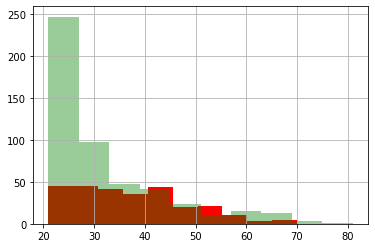

In [16]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

d[d.Class==1].Age.hist(color='red')
d[d.Class==0].Age.hist(color='green', alpha=0.4)

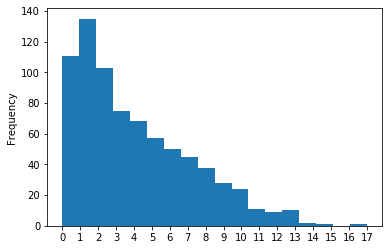

In [17]:
d.Pregnancies.plot(kind='hist', bins=18, xticks=range(0,18))

__Задание 11.__

Постройте круговую диаграмму для признака __Class__.

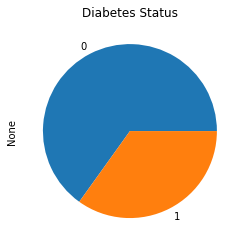

In [18]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
d.groupby('Class').size().plot(kind='pie', title='Diabetes Status')

__Задание 12.__

Постройте распределения для признаков __Age__ и __BloodPressure__ и сравните оба распределения с нормальным. 

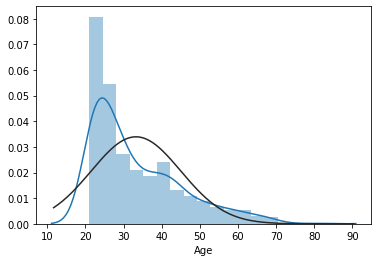

In [19]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

sns.distplot(d.Age, fit=norm)

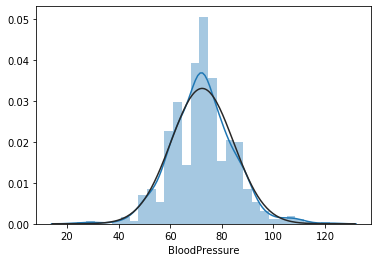

In [20]:
sns.distplot(d.BloodPressure, fit=norm)

__Задание 13.__

Постройте следующий график: среднее число больных диабетом в зависимости от числа беременностей.

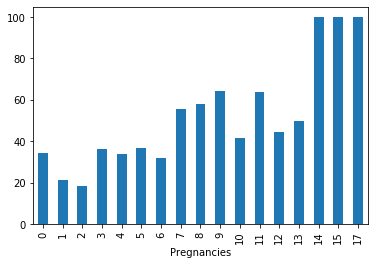

In [63]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

# d.groupby(['Pregnancies'])['Class'].value_counts().unstack()[[1]].plot()
d1 = d.groupby(['Pregnancies'])['Class'].value_counts().unstack().copy()
d1 = d1.fillna({0:0})
d1['%_ill'] = d1[1]/(d1[0]+d1[1])*100
# print(d1)
d1['%_ill'].plot(kind='bar')

__Задание 14.__

Добавьте новый бинарный признак:

__wasPregnant__ $\in$ {0,1} - была женщина беременна (1) или нет (0)

In [64]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

d['wasPregnant'] = d['Pregnancies'].apply(lambda x: 0 if x==0 else 1)
d.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,wasPregnant,bodyType
0,6,148.0,72.0,35.0,125.0,33.600000,0.627,50,1,1,Obesity
1,1,85.0,66.0,29.0,125.0,26.600000,0.351,31,0,1,Overweight
2,8,183.0,64.0,29.0,125.0,23.300000,0.672,32,1,1,Normal weight
3,1,89.0,66.0,23.0,94.0,28.100000,0.167,21,0,1,Overweight
4,0,137.0,40.0,35.0,168.0,43.100000,2.288,33,1,0,Obesity
5,5,116.0,74.0,29.0,125.0,25.600000,0.201,30,0,1,Overweight
6,3,78.0,50.0,32.0,88.0,31.000000,0.248,26,1,1,Obesity
7,10,115.0,72.0,29.0,125.0,35.300000,0.134,29,0,1,Obesity
8,2,197.0,70.0,45.0,543.0,30.500000,0.158,53,1,1,Obesity
9,8,125.0,96.0,29.0,125.0,32.457464,0.232,54,1,1,Obesity


__Задание 15.__

Сравните процент больных диабетом среди женщин, которые были беременны и не были.

In [65]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

perc_p = round(d[(d.wasPregnant==1) & (d.Class==1)].shape[0]/d[(d.wasPregnant==1)].shape[0]*100, 2)
perc_n = round(d[(d.wasPregnant==0) & (d.Class==1)].shape[0]/d[(d.wasPregnant==0)].shape[0]*100, 2)
print('Процент больных диабетом среди женщин, которые были беременны:', perc_p)
print('Процент больных диабетом среди женщин, которые не были беременны:', perc_n)

if perc_p > perc_n:
    print('Больший процент больных диабетом среди женщин, которые были беременны')
elif perc_p < perc_n:
    print('Больший процент больных диабетом среди женщин, которые не были беременны')
else:
    print('Проценты больных диабетом оказались одинаковыми')

Процент больных диабетом среди женщин, которые были беременны: 35.01
Процент больных диабетом среди женщин, которые не были беременны: 34.23
Больший процент больных диабетом среди женщин, которые были беременны


__Задание 16.__

Добавьте новый категориальный признак __bodyType__ на основе столбца BMI:

__BMI Categories:__ 

Underweight = <18.5

Normal weight = 18.5–24.9 

Overweight = 25–29.9 

Obesity = BMI of 30 or greater

Признак должен принимать значения Underweight, Normal weight, Overweight и Obesity.

In [66]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

def body_type(x):
    if x <= 18.5:
        return 'Underweight'
    elif x <= 24.9:
        return 'Normal weight'
    elif x <= 29.9:
        return 'Overweight'
    else:
        return 'Obesity'

d['bodyType'] = d['BMI'].apply(body_type)
d.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,wasPregnant,bodyType
0,6,148.0,72.0,35.0,125.0,33.600000,0.627,50,1,1,Obesity
1,1,85.0,66.0,29.0,125.0,26.600000,0.351,31,0,1,Overweight
2,8,183.0,64.0,29.0,125.0,23.300000,0.672,32,1,1,Normal weight
3,1,89.0,66.0,23.0,94.0,28.100000,0.167,21,0,1,Overweight
4,0,137.0,40.0,35.0,168.0,43.100000,2.288,33,1,0,Obesity
5,5,116.0,74.0,29.0,125.0,25.600000,0.201,30,0,1,Overweight
6,3,78.0,50.0,32.0,88.0,31.000000,0.248,26,1,1,Obesity
7,10,115.0,72.0,29.0,125.0,35.300000,0.134,29,0,1,Obesity
8,2,197.0,70.0,45.0,543.0,30.500000,0.158,53,1,1,Obesity
9,8,125.0,96.0,29.0,125.0,32.457464,0.232,54,1,1,Obesity


__Задание 17.__

Будем считать "здоровыми" тех, у кого нормальный вес и кровяное давление. Какой процент "здоровых" женщин больны диабетом?

In [67]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

h_sick = d[(d.bodyType=='Normal weight') & (d.BloodPressure>=80) & (d.BloodPressure<=89) & (d.Class==1)].shape[0]
h_all = d[(d.bodyType=='Normal weight') & (d.BloodPressure>=80) & (d.BloodPressure<=89)].shape[0]
print(round(h_sick/h_all*100, 2))

10.0
